<img src="carro.jfif"/>

<center><h1 style="color:#FF7F50">Analisis de datos</h1> </center> 
<center><h5 style="color:#8B008B">Universidad Castro Carazo</h1> </center> 
<center><h6 style="color:##ADFF2F">IC-2023</h1> </center> 
</br>
<p style= "text-align:justify"> Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.Como se puede incrementar las ventas de autos de segunda mano? Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones.</p>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile"> Fuente de datos para el proceso de análisis </a> 



<h2 style=color: #008B8B>l. Cargar y estandarizar  los set de datos </h2>
</br>
<p> ¿Que se hace en esta etapa? </p>
</br>
<ol>
    <li>Importar librerías necesarias</li>
    <li>Importar el o los sets de datos</li>
    <li>Revisar los encabezados de DataFrames</li>
    <li>Si solo se tiene,os más de 1 set de datos, los vamos a unir en uno solo</li>
 </ol>
 <h3 style="color:#6495ED" > 1.1 Importar las librerías de Pyhton necesarias </h3>

In [1]:
import pandas as pd #Se usa para el manejo de grandes volumenes de datos-DataFrame.
import numpy as np #Se usa para el manejo de datos: Tuplas, listas, Dicciomarios.
import matplotlib.pyplot as plt #Permite crear gráficos.

<h3 style ="color:#696969" > 1.2 Importar el o los sets de datos </h3> 

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "Bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]
df_1er_set=pd.read_csv("autos.csv", names =cols)
df_2do_set=pd.read_csv("Autos1.csv", names =cols)

In [3]:
df_1er_set.head (5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df_1er_set.shape #saber el tamaño de la data

(197, 26)

In [5]:
df_1er_set.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [6]:
df_1er_set.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
df_1er_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  Bore         197 non-null    object 
 19  stroke  

<h3 style="color: #6995ED">l. Revisar los encabezados de los Data Frames </h3>
</br>
<p> Se motiva la estandarización de los nombres de las columnas, considerando lo siguiente:
</p>

<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar por números</li>
    <li>Si el nombre se conforma por 2 o más palabras la letra inicial de cada palabra va en mayúscula</li>
    <li>No debe exisitir nombres repetidos</li>
 </ol>

In [8]:
df_1er_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'Bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [9]:
df_2do_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'Bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_1er_set.rename({'engine-size':'engineSize'}, axis=1, inplace=True) #inplace=true es para que se mofifiquen las palabras y quede aplicada la instrucción
df_2do_set.rename({'engine-size':'engineSize'}, axis=1, inplace=True)
df_1er_set.head (2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [11]:
df_2do_set.head (2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989


<h3 Style ="color:#696969" >1.4) Unir los set de datos</h3> 

In [12]:
unionArchivos = [df_1er_set, df_2do_set]
dfAutos = pd.concat (unionArchivos)
dfAutos.shape
#se pueden unificar n cantidad de datos aunque estos sean diferentes, la opción concatena los datos

(226, 26)

<h2 style= color: #008B8B> 2. Manejo de los valores faltantes o perdidos </h2>
</br>
<p> ¿Que se hace en esta etapa? </p>
</br>
<ol>
    <li>Identificar como se muestran los valores faltantes y estandarizarlos</li>
    <li>Contar la cantidad de los valores faltantes por variable</li>
    <li>Analizar la imputación de los valores numéricos (con la media)</li>
    <li>Analizar la imputación de los valores categóricos (con valor más frecuente )</li>
    <li>Eliminar filas de valores faltantes</li>
 </ol>
 <h3 style="color:#6495ED" > 2.1 Indentificar como se nuestran los valores faltantes </h3>

In [13]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [14]:
dfAutos.replace ('?', np.nan, inplace=True)
dfAutos.head (5)


,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


 <h3 style="color:#6495ED" > 2.2 Contar la cantidad de valores faltantes </h3>

In [15]:
dfValoresFaltantes=dfAutos.isnull()
dfValoresFaltantes.head(3)


,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
for column in dfValoresFaltantes.columns.values.tolist():
    print (column)
    print (dfValoresFaltantes[column].value_counts())
    print(" ")

symboling
False    226
Name: symboling, dtype: int64
 
normalized
False    180
True      46
Name: normalized, dtype: int64
 
make
False    226
Name: make, dtype: int64
 
fuel
False    226
Name: fuel, dtype: int64
 
aspiration
False    226
Name: aspiration, dtype: int64
 
doors
False    224
True       2
Name: doors, dtype: int64
 
style
False    226
Name: style, dtype: int64
 
wheels
False    226
Name: wheels, dtype: int64
 
engine
False    226
Name: engine, dtype: int64
 
base
False    226
Name: base, dtype: int64
 
length
False    226
Name: length, dtype: int64
 
width
False    226
Name: width, dtype: int64
 
heingt
False    226
Name: heingt, dtype: int64
 
curb
False    226
Name: curb, dtype: int64
 
engineType
False    226
Name: engineType, dtype: int64
 
Cylinders
False    226
Name: Cylinders, dtype: int64
 
engineSize
False    226
Name: engineSize, dtype: int64
 
system
False    226
Name: system, dtype: int64
 
Bore
False    222
True       4
Name: Bore, dtype: int64
 
stroke
False

In [17]:
#Revisión de los datos faltantes (dominios)
#Los datos faltantes serán True y los no faltantes False

#normalized= int
#Doors= caracter
#Bore = float
#Stroke= float
#Horsepower = int (aunque sea un int siempre se pone float para que sea decimal)
#Peak= int
#Price = float
#Se analiza la media de los valores faltantes en el caso de que la empresa no pueda proporcionarlos, para lograr completar la data. 

 <h3 style="color:#6495ED" > 2.3 Analizar la imputación de valores numéricos </h3>

In [18]:
mean_value = dfAutos['normalized'].astype('float').mean(axis=0)
print ("La media de normalized es: ", mean_value)

La media de normalized es:  122.28333333333333


In [19]:
mean_value = dfAutos['Bore'].astype('float').mean(axis=0)
print ("La media de normalized es: ", mean_value)

La media de normalized es:  3.319459459459461


In [20]:
mean_value = dfAutos['stroke'].astype('float').mean(axis=0)
print ("La media de normalized es: ", mean_value)

La media de normalized es:  3.2785135135135075


In [21]:
mean_value = dfAutos['horsepower'].astype('float').mean(axis=0)
print ("La media de normalized es: ", mean_value)

La media de normalized es:  102.98214285714286


In [22]:
mean_value = dfAutos['peak'].astype('float').mean(axis=0)
print ("La media de normalized es: ", mean_value)

La media de normalized es:  5100.892857142857


In [23]:
dfAutos ['normalized'].replace(np.nan, 122, inplace=True)
dfAutos ['Bore'].replace(np.nan, 3.31, inplace=True)
dfAutos ['stroke'].replace(np.nan, 3.27, inplace=True)
dfAutos ['horsepower'].replace(np.nan, 102, inplace=True)
dfAutos ['peak'].replace(np.nan, 5100, inplace=True)
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


 <h3 style="color:#6495ED" > 2.4 Analizar la imputación de valores caracter con el dato más frecuente </h3>

In [24]:
dfAutos ['doors'].value_counts().idxmax() 

'four'

In [25]:
dfAutos['doors'].replace(np.nan,'four', inplace=True) #coloca el dato más freceunte en caracter y al enocntrarlo da como resultado la cantidad en caracter
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


<h3 style="color:#6495ED" > 2.5 Eliminar filas con valores faltantes </h3>

In [26]:
#Siempre se eliminan filas nunca columnas, solo que tenga un alto porcentaje de datos faltantes

In [27]:
dfAutos.dropna(subset=['price'], axis=0, inplace= True)
dfAutos.reset_index (drop=True, inplace=True) #borrar el indice y las filas de la data
#Elimina la fila que esta con valores faltantes de la fila "price"

In [28]:
dfValoresFaltantes=dfAutos.isnull()
for column in dfValoresFaltantes.columns.values.tolist():
    print (column)
    print (dfValoresFaltantes[column].value_counts())
    print(" ")

symboling
False    222
Name: symboling, dtype: int64
 
normalized
False    222
Name: normalized, dtype: int64
 
make
False    222
Name: make, dtype: int64
 
fuel
False    222
Name: fuel, dtype: int64
 
aspiration
False    222
Name: aspiration, dtype: int64
 
doors
False    222
Name: doors, dtype: int64
 
style
False    222
Name: style, dtype: int64
 
wheels
False    222
Name: wheels, dtype: int64
 
engine
False    222
Name: engine, dtype: int64
 
base
False    222
Name: base, dtype: int64
 
length
False    222
Name: length, dtype: int64
 
width
False    222
Name: width, dtype: int64
 
heingt
False    222
Name: heingt, dtype: int64
 
curb
False    222
Name: curb, dtype: int64
 
engineType
False    222
Name: engineType, dtype: int64
 
Cylinders
False    222
Name: Cylinders, dtype: int64
 
engineSize
False    222
Name: engineSize, dtype: int64
 
system
False    222
Name: system, dtype: int64
 
Bore
False    222
Name: Bore, dtype: int64
 
stroke
False    222
Name: stroke, dtype: int64
 
co

<h2 style=color: #008B8B>3. Estandarización de los datos </h2>
</br>
<p> ¿Que se hace en esta etapa? </p>
</br>
<ol>
    <li>Verificar el dominio de cada variable y se ajsuta si es necesario</li>
    <li>Se convierten los valores en función de su interpretación</li>
    <li>Se normalizan los dtaos para que los valores queden entre 0 y 1</li>
    <li>Binning: crear categorías para el resumen de datos</li>
 </ol>
 <h3 style="color:#6495ED" > 3.1 Verificar los dominios de variables </h3>

In [29]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
dfAutos.dtypes
#Se revisan los datos en la metadata, para comprobar sin coincide con lo reflejado y se procede a trabajr en ellos para que estè dentro del dominio correcto de datos

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
Bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [31]:
dfAutos[['normalized']]=dfAutos[['normalized']].astype("int") 
dfAutos.dtypes
#Covierte los objects en enteros, en este caso se realiza con el dato "normalized"

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
Bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [32]:
dfAutos[['Bore', 'stroke', 'peak', 'price', 'Higway']]=dfAutos[['Bore', 'stroke', 'peak', 'price', 'Higway']].astype("float") 
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
Bore           float64
stroke         float64
compression    float64
horsepower      object
peak           float64
City             int64
Higway         float64
price          float64
dtype: object

In [33]:
dfAutos [['horsepower']]=dfAutos[['horsepower']].astype("int") 
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
Bore           float64
stroke         float64
compression    float64
horsepower       int32
peak           float64
City             int64
Higway         float64
price          float64
dtype: object

<h3 style="color:#6495ED" > 3.2 Convertir valores en función de su interpretación </h3>

In [34]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,Bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0


In [35]:
#Se analizan los datos de City y Higway que equivalen al gasto de gasolina de los veìculos, por lo que debe hacerse la convesiónde millas por galón a kilómteros por litro
dfAutos["City L/100km"]=235//dfAutos["City"]
dfAutos.head(3)
#Formula que realiza la conversión, además se crea una columna adicional que muestra la información de los Litros*KM, el cual se agrega para no eliminar datos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,Bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12


In [36]:
dfAutos["Higway L/100km"]=235//dfAutos["Higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,Bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11,8.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11,8.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12,9.0


<h3 style="color:#6495ED" > 3.3 Se normalizan los dtaos para que los valores queden entre 0 y 1 </h3>


In [37]:
dfAutos.head(4)
#Proceao que se realiza para que los valores puedan ser comparables, princiaplmente cuando existe una gran cantidad dificil de analizar

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,Bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11,8.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11,8.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12,9.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9,7.0


In [38]:
dfTemp=dfAutos[["length", "width", "heingt"]]
dfTemp.head(5)
#Lo que se quiere es que se debidan las cantidades de los datos por el número más alto, con lo que se logra visualizar valores entre 0 y 1

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [39]:
dfAutos['lengthNorm'] =dfAutos['length']/dfAutos['length'].max()
dfAutos['widthNorm'] =dfAutos['width']/dfAutos['width'].max()
dfAutos['heingtNorm'] =dfAutos['heingt']/dfAutos['heingt'].max()

dfTemp= dfAutos[["lengthNorm", "widthNorm", "heingtNorm"]]
dfTemp.head(5)

,lengthNorm,widthNorm,heingtNorm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [40]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,lengthNorm,widthNorm,heingtNorm
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27.0,13495.0,11,8.0,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27.0,16500.0,11,8.0,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26.0,16500.0,12,9.0,0.822681,0.909722,0.876254


 <h3 style="color:#6495ED" > 3.4 Binning: crear categorías para el resumen de datos </h3>

In [41]:
dfTemp=dfAutos[["horsepower"]]
dfTemp.head(5)

,horsepower
0,111
1,111
2,154
3,102
4,115


In [42]:
bins=np.linspace(min(dfAutos["horsepower"]),max(dfAutos["horsepower"]),4) #en la formula, el número al final representa la cantidad de categorías que se quieren describir
bins
#Este dataframe se utiliza para lograr definir categorías conforme a los minimos y máximos para definirlas 

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [43]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,Bore,stroke,...,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,lengthNorm,widthNorm,heingtNorm
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.319955,3.280090,...,102.180180,5093.468468,25.445946,30.990991,12780.941441,9.297297,7.468468,0.836448,0.914389,0.899108
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258981,0.305005,...,36.334344,481.973832,6.272417,6.701787,7530.446820,2.431299,1.748017,0.056322,0.027366,0.039598
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.000000,4.000000,0.678039,0.837500,0.799331
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,...,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.000000,6.000000,0.804181,0.891667,0.869565
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,...,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.000000,7.000000,0.832292,0.909722,0.904682
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,...,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.000000,9.000000,0.865930,0.923611,0.931020
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.000000,14.000000,1.000000,1.000000,1.000000


In [44]:
groupNames= ["pequeño","Mediano", "Grande"]
dfAutos['horsepowerBins']=pd.cut(dfAutos["horsepower"], bins, labels=groupNames, include_lowest=True)
dfAutos [['horsepower', 'horsepowerBins']].head(5)


,horsepower,horsepowerBins
0,111,pequeño
1,111,pequeño
2,154,Mediano
3,102,pequeño
4,115,pequeño


In [45]:
dfAutos['horsepowerBins'].value_counts()

pequeño    174
Mediano     43
Grande       5
Name: horsepowerBins, dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

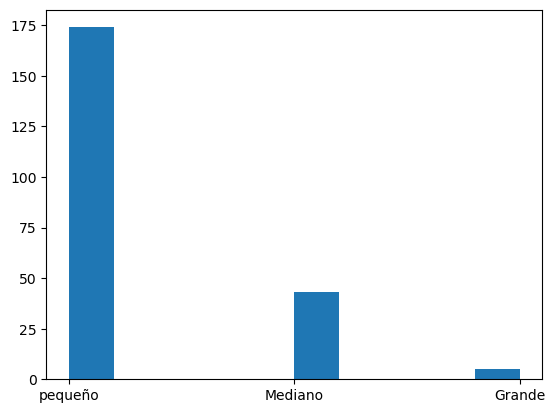

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfAutos['horsepowerBins'])

plt.pyplot.xlable("Caballos de fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Cantidad de carros según los caballos de fuerza")

In [47]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,peak,City,Higway,price,City L/100km,Higway L/100km,lengthNorm,widthNorm,heingtNorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27.0,13495.0,11,8.0,0.811148,0.890278,0.816054,pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27.0,16500.0,11,8.0,0.811148,0.890278,0.816054,pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26.0,16500.0,12,9.0,0.822681,0.909722,0.876254,Mediano
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30.0,13950.0,9,7.0,0.848630,0.919444,0.908027,pequeño
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22.0,17450.0,13,10.0,0.848630,0.922222,0.908027,pequeño
